# 1.Recovering Missing Data
### 1.2Apply the above-described scheme for recovering missing data for its prediction task

Original dataset (with missing values):
     X          Y
0    1   7.792157
1    2   6.200472
2    3  10.436214
3    4  16.722680
4    5        NaN
5    6  12.068166
6    7  20.350265
7    8  19.545928
8    9  22.190343
9   10        NaN
10  11  27.932131
11  12  34.362821
12  13  34.783113
13  14  35.365025
14  15        NaN
15  16  41.001023
16  17  46.982237
17  18  44.384525
18  19  48.439203
19  20  47.437713

Dataset filled using average method:
     X          Y
0    1   7.792157
1    2   6.200472
2    3  10.436214
3    4  16.722680
4    5  27.999648
5    6  12.068166
6    7  20.350265
7    8  19.545928
8    9  22.190343
9   10  27.999648
10  11  27.932131
11  12  34.362821
12  13  34.783113
13  14  35.365025
14  15  27.999648
15  16  41.001023
16  17  46.982237
17  18  44.384525
18  19  48.439203
19  20  47.437713

Dataset filled using regression method:
     X          Y  Y_regression_fill
0    1   7.792157           7.792157
1    2   6.200472           6.200472
2    3  10.436

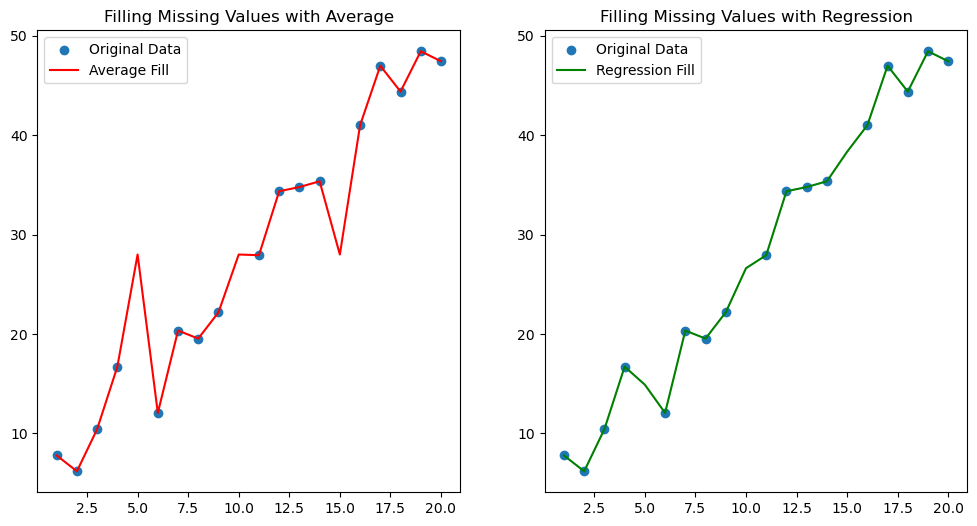

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create example dataset
np.random.seed(0)
X = np.arange(1, 21)
Y = 2.5 * X + np.random.normal(0, 3, 20)  # Dependent variable with some noise

# Intentionally create some missing values
Y_missing_indices = [4, 9, 14]  # 5th, 10th, 15th data points
Y[Y_missing_indices] = np.nan  # Set these values to NaN to simulate missing data

# Convert to DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Display dataset with missing values
print("Original dataset (with missing values):")
print(df)

# Method 1: Fill missing values with simple average
df_simple_fill = df.copy()
df_simple_fill['Y'] = df_simple_fill['Y'].fillna(df_simple_fill['Y'].mean())

# Method 2: Fill missing values using regression
# Remove rows with missing values to fit the model
df_for_regression = df.dropna()
X_train = df_for_regression[['X']]
Y_train = df_for_regression['Y']

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict Y values for all X using the model
df['Y_predicted'] = model.predict(df[['X']])

# Fill missing values in original Y with predicted values
df['Y_regression_fill'] = df['Y'].fillna(df['Y_predicted'])

# Display filled datasets
print("\nDataset filled using average method:")
print(df_simple_fill)
print("\nDataset filled using regression method:")
print(df[['X', 'Y', 'Y_regression_fill']])

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, label='Original Data')
plt.plot(X, df_simple_fill['Y'], color='red', label='Average Fill')
plt.title('Filling Missing Values with Average')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, Y, label='Original Data')
plt.plot(X, df['Y_regression_fill'], color='green', label='Regression Fill')
plt.title('Filling Missing Values with Regression')
plt.legend()

plt.show()


### 2.Analyze the results

#### Average Method: 
Simple and effective for random or uniformly missing data. It works well when the dataset lacks complex patterns, but may not capture trends or relationships within the data.

#### Regression Method: 
More accurate for datasets with clear relationships between variables. It leverages these relationships to predict missing values, offering better estimates in the presence of linear patterns or trends.

1.Use the average method for simplicity or when data patterns are not evident.
2.Opt for the regression method to exploit linear relationships between variables for more precise imputation of missing values.

# 2.Data Release Analysis:
### 1.2Apply the above described data release analysis scheme to your predicting task

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Simulate dataset
np.random.seed(42)
time_periods = np.arange(1, 21)
production_costs = np.random.normal(100, 10, size=20)
production_costs[10] = 200  # Simulate a significant release

# Remove the release for analysis
data = pd.DataFrame({'Time': time_periods, 'Costs': production_costs})
release_point = data.loc[10]  # Assume release at index 10
data_analysis = data.drop(10)

# Construct regression without the release
model = LinearRegression()
model.fit(data_analysis[['Time']], data_analysis['Costs'])

# Estimate value for the release period using the model
estimated_release_value = model.predict(pd.DataFrame([[release_point['Time']]], columns=['Time']))

# Calculate
residual = release_point['Costs'] - estimated_release_value

# Normalize the residue 
normalized_residual = residual / data_analysis['Costs'].std()

# Analyze Results
print(f"Estimated Value for Release Point: {estimated_release_value[0]:.2f}")
print(f"Actual Value at Release Point: {release_point['Costs']:.2f}")
print(f"Residual: {residual[0]:.2f}")
print(f"Normalized Residual: {normalized_residual[0]:.2f}")


Estimated Value for Release Point: 97.92
Actual Value at Release Point: 200.00
Residual: 102.08
Normalized Residual: 10.38


### 2.Analyze the results

1.The estimated value for the release point is calculated using the regression model, which is based on the linear relationship identified in the data excluding the release.
2.The actual value at the release point significantly deviates from the estimated value, indicating a potential outlier or significant event.
3.The residual and normalized residual provide a measure of this deviation, with a high normalized residual suggesting that the release is significant and not just a random fluctuation.